In [23]:
%run ./Functions_PM_Irvin2.ipynb

m_1 = b1_mass = M_sun
m_2 = b2_mass = M_sun

R_S = 2*(b1_mass + b2_mass)*G/c**2

mass_bin = b1_mass + b2_mass
SMA_bin = 100*R_S
v_redmass = np.sqrt(G*mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

In [24]:
t_max = 2*np.pi*np.sqrt(rel_len(x_1, x_2)**3/(G*(m_1 + m_2)))*1e3
res = 1e4
dt = t_max/res

pos1 = np.zeros((2, int(t_max/dt)))
pos2 = np.zeros((2, int(t_max/dt)))
vel1 = np.zeros((2, int(t_max/dt)))
vel2 = np.zeros((2, int(t_max/dt)))
acc1 = np.zeros((2, int(t_max/dt)))
acc2 = np.zeros((2, int(t_max/dt)))

for i in range(int(t_max/dt)):
    pos1[:,i] = x_1
    pos2[:,i] = x_2
    vel1[:,i] = v_1
    vel2[:,i] = v_2

    a_1, a_2 = accelerationPM(x_1, x_2, v_1, v_2, m_1, m_2, DL=False)

    acc1[:,i] = a_1
    acc2[:,i] = a_2

    v_1, v_2 = boost(v_1, v_2, a_1, a_2, dt)
    x_1, x_2 = move(x_1, x_2, v_1, v_2, dt)
    

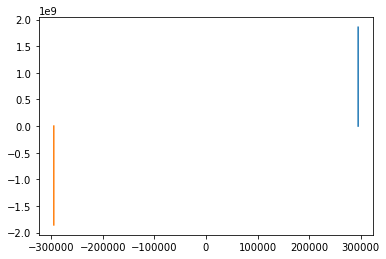

In [25]:
plt.plot(pos1[0], pos1[1])
plt.plot(pos2[0], pos2[1])

In [8]:
pos1, vel1, acc1

(array([[2.95325008e+05, 2.95325008e+05, 2.95325008e+05, ...,
         2.95325008e+05, 2.95325008e+05, 2.95325008e+05],
        [3.47586229e+00, 3.47603735e+00, 3.47621240e+00, ...,
         4.92576810e+00, 4.92589189e+00, 4.92601569e+00]]),
 array([[-3.18523057e-16, -3.18523057e-16, -3.18523057e-16, ...,
         -3.18523057e-16, -3.18523057e-16, -3.18523057e-16],
        [ 9.99950004e-03,  9.99900015e-03,  9.99850034e-03, ...,
          7.07142139e-03,  7.07124460e-03,  7.07106781e-03]]),
 array([[-1.44185141e-42, -1.44185138e-42, -1.44185135e-42, ...,
         -1.44170726e-42, -1.44170725e-42, -1.44170725e-42],
        [-8.54507927e-50, -8.54507931e-50, -8.54507936e-50, ...,
         -8.54529285e-50, -8.54529286e-50, -8.54529287e-50]]))